In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Visualization
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#EDA
from collections import Counter
from pydantic_settings import BaseSettings
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [63]:
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')

In [64]:
#import dataset
heart_df = pd.read_csv(r'C:\Users\ethan\Downloads\heart_disease_health_indicators_BRFSS2015.csv')

In [65]:
# dont drop for now
heart_df = heart_df.drop(['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income'], axis = 1)

In [66]:
heart_df['MentHlth'] = np.log(heart_df['MentHlth'])
heart_df['PhysHlth'] = np.log(heart_df['PhysHlth'])
heart_df['GenHlth'] = np.log(heart_df['GenHlth'])

# Check for and handle infinite values
heart_df.replace([np.inf, -np.inf], np.nan, inplace=True)
heart_df.dropna(inplace=True)  # Drop rows with NaNs

# Calculate variance after handling infinite values
variance = np.var(heart_df[['MentHlth', 'PhysHlth', 'GenHlth']])
print(variance)

MentHlth    1.249166
PhysHlth    1.374625
GenHlth     0.159380
dtype: float64


In [67]:
x = heart_df.drop('HeartDiseaseorAttack',axis=1)    
y = heart_df['HeartDiseaseorAttack']

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

LOGISTIC REGRESSION

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

log_reg_model = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predicted = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,lr_predicted)*100,"%")

confusion matrix
[[7405  123]
 [1080  179]]


Accuracy of Logistic Regression: 86.30932058723114 

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      7528
         1.0       0.59      0.14      0.23      1259

    accuracy                           0.86      8787
   macro avg       0.73      0.56      0.58      8787
weighted avg       0.83      0.86      0.83      8787

Training accuracy score of the model is: 85.99556137256018 %
Testing accuracy score of the model is: 86.30932058723114 %


In [70]:
lr.predict()

TypeError: LinearClassifierMixin.predict() missing 1 required positional argument: 'X'

In [ ]:
llllllllllllllllll
llllllllllllllll
llllllllllllllllllll
lllllllllllllll
lllllllllllllllllll
llllllllllllllllllll
llllllllllllll
lllllllllllllll
llllllllllllllll
lllllllllllllllllll
llllllllllllllllll
llllllllllllllllllll
llllllllllllllll
lllllllllllllllllll
lllllllllllllllll
lllllllllllllll
llllllllllllllllllll
lllllllllllllllll
lllllllllllllllll
llllllllllllllllll
lllllllllllllllll
llllllllllllllll
lllllllllllllllll
lllllllllllllllllll
lllllllllllllllll
lllllllllllllllll
lllllllllllllllll
llllllllllllllllll
llllllllllllllllll
llllllllllllllll
llllllllllllllll
llllllllllllllll
llllllllllllllll
llllllllllllllll
llllllllllllllll
lllllllllllllllll
lllllllllllllll
llllllllllllll
llllllllllllllll
lllllllllllllllll
llllllllllllllll
l

NameError: name 'precision_score' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assuming you have your heart disease dataset loaded into X and y

# Perform oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

# Split the resampled data into training and test sets with stratified split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Now you can proceed to train your model using X_train and y_train, and evaluate on X_test and y_test


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assuming you have loaded and preprocessed your heart disease dataset into X (features) and y (target variable)

# Train a Logistic Regression classifier
logreg_model = LogisticRegression()
logreg_model.fit(x, y)

# User input for predictor variables
smoking_history = input("Do you have a smoking history? (yes/no): ").lower()
cholesterol = input("Is your cholesterol level high? (yes/no): ").lower()
blood_pressure = input("Is your blood pressure high? (yes/no): ").lower()
physical_activity = input("Do you engage in physical activity? (yes/no): ").lower()

# Convert user input to binary values
smoking_binary = 1 if smoking_history == 'yes' else 0
cholesterol_binary = 1 if cholesterol == 'high' else 0
blood_pressure_binary = 1 if blood_pressure == 'high' else 0
physical_activity_binary = 1 if physical_activity == 'yes' else 0

# Create a feature vector for the user input
user_input = np.array([[smoking_binary, cholesterol_binary, blood_pressure_binary, physical_activity_binary]])

# Predict the probability of heart disease for the user
probability = logreg_model.predict_proba(user_input)[:, 1][0]  # Probability of belonging to class 1 (heart disease)

# Convert probability to percentage
likelihood_percent = probability * 100

print(f"The likelihood of you getting heart disease is {likelihood_percent:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have your heart disease dataset loaded into X and y

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Make predictions on training data and test data
train_predictions = logreg_model.predict_proba(x_train)[:, 1]  # Predicted probabilities for training data
test_predictions = logreg_model.predict_proba(x_test)[:, 1]    # Predicted probabilities for test data

# Sort the training predictions by ascending order
sorted_indices_train = np.argsort(train_predictions)
sorted_train_predictions = train_predictions[sorted_indices_train]
sorted_y_train = y_train.values[sorted_indices_train]

# Sort the test predictions by ascending order
sorted_indices_test = np.argsort(test_predictions)
sorted_test_predictions = test_predictions[sorted_indices_test]
sorted_y_test = y_test.values[sorted_indices_test]

# Plot the prediction model scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_train_predictions)), sorted_train_predictions, c=sorted_y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Samples (sorted by predicted probabilities)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Model Predictions on Training Data')
plt.colorbar(label='Actual Class (0: No Heart Disease, 1: Heart Disease)')
plt.xticks([])
plt.show()

# Plot the prediction model scatter plot for test data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_test_predictions)), sorted_test_predictions, c=sorted_y_test, cmap='viridis', edgecolors='k')
plt.xlabel('Samples (sorted by predicted probabilities)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Model Predictions on Test Data')
plt.colorbar(label='Actual Class (0: No Heart Disease, 1: Heart Disease)')
plt.xticks([])
plt.show()

K NEAREST NEIGHBORS

In [ ]:
knn_model = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,knn_predicted)*100,"%")

confusion matrix
[[7512   16]
 [1235   24]]


Accuracy of K-NeighborsClassifier: 85.76305906452714 

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      7528
         1.0       0.60      0.02      0.04      1259

    accuracy                           0.86      8787
   macro avg       0.73      0.51      0.48      8787
weighted avg       0.82      0.86      0.80      8787

Training accuracy score of the model is: 85.7423319865703 %
Testing accuracy score of the model is: 85.76305906452714 %


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, dt.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,dt_predicted)*100,"%")

confusion matrix
[[7456   72]
 [1147  112]]


Accuracy of DecisionTreeClassifier: 86.12723341299647 

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92      7528
         1.0       0.61      0.09      0.16      1259

    accuracy                           0.86      8787
   macro avg       0.74      0.54      0.54      8787
weighted avg       0.83      0.86      0.81      8787

Training accuracy score of the model is: 86.2601718545496 %
Testing accuracy score of the model is: 86.12723341299647 %


NAIVE BAYES

In [ ]:
nb_model = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predicted = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
nb_acc_score = accuracy_score(y_test, nb_predicted)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, nb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,nb_predicted)*100,"%")

confusion matrix
[[5904 1624]
 [ 440  819]]


Accuracy of Naive Bayes model: 76.51075452372822 

              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      7528
         1.0       0.34      0.65      0.44      1259

    accuracy                           0.77      8787
   macro avg       0.63      0.72      0.65      8787
weighted avg       0.85      0.77      0.79      8787



Training accuracy score of the model is: 76.74557559893019 %
Testing accuracy score of the model is: 76.51075452372822 %


RANDOM FOREST

In [ ]:
rf_model = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, rf.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,rf_predicted)*100,"%")

confusion matrix
[[7513   15]
 [1212   47]]


Accuracy of Random Forest: 86.03618982587913 

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      7528
         1.0       0.76      0.04      0.07      1259

    accuracy                           0.86      8787
   macro avg       0.81      0.52      0.50      8787
weighted avg       0.85      0.86      0.80      8787

Training accuracy score of the model is: 86.03539520855858 %
Testing accuracy score of the model is: 86.03618982587913 %


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming you have your features X and target variable y defined

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Define the number of folds for k-fold cross-validation
num_folds = 10

# Initialize k-fold cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_classifier, x, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.86003641 0.8588985  0.85116067 0.84862281 0.84816754 0.85863874
 0.85886638 0.84839517 0.84566356 0.8465741 ]
Mean Accuracy: 0.8525023879903282


Training Accuracy: 0.9994
Test Accuracy: 0.8601


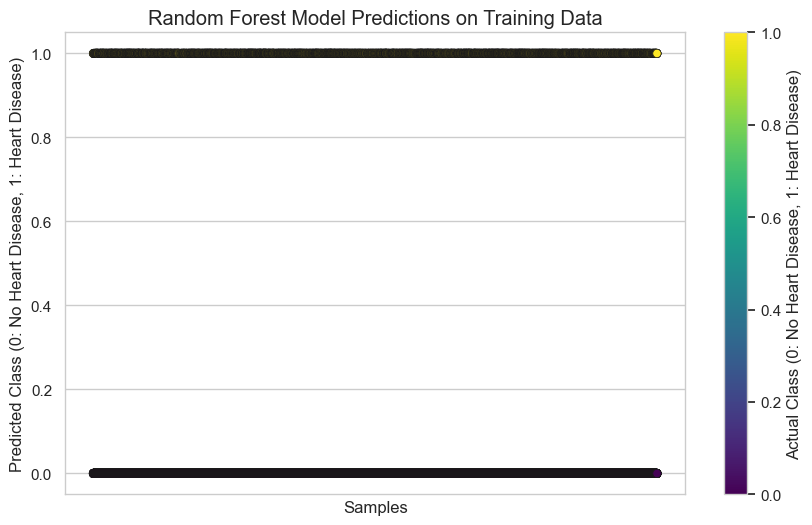

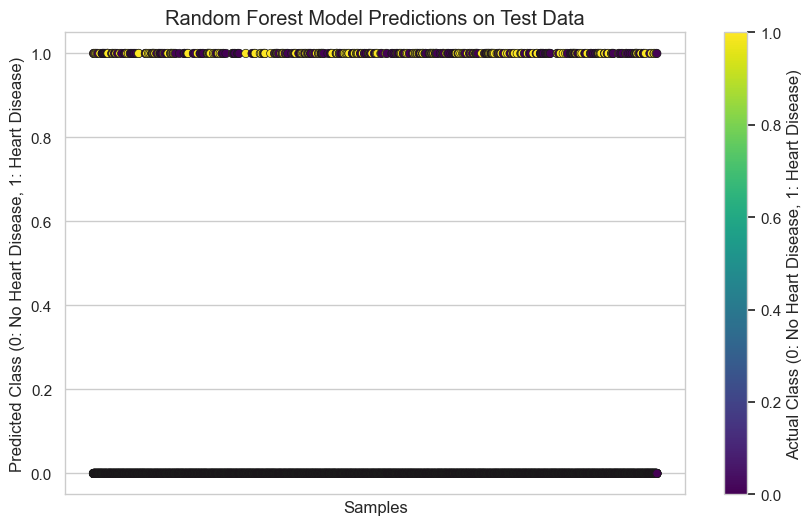

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your heart disease dataset loaded into X and y

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions on training data and test data
train_predictions = rf_model.predict(x_train)
test_predictions = rf_model.predict(x_test)

# Calculate accuracy on training and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the predicted classes for training data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(train_predictions)), train_predictions, c=y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Samples')
plt.ylabel('Predicted Class (0: No Heart Disease, 1: Heart Disease)')
plt.title('Random Forest Model Predictions on Training Data')
plt.colorbar(label='Actual Class (0: No Heart Disease, 1: Heart Disease)')
plt.xticks([])
plt.show()

# Plot the predicted classes for test data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_predictions)), test_predictions, c=y_test, cmap='viridis', edgecolors='k')
plt.xlabel('Samples')
plt.ylabel('Predicted Class (0: No Heart Disease, 1: Heart Disease)')
plt.title('Random Forest Model Predictions on Test Data')
plt.colorbar(label='Actual Class (0: No Heart Disease, 1: Heart Disease)')
plt.xticks([])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score


# Initialize and train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
parameters = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(rf_model, parameters, cv=5, scoring='recall')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred_rf = best_rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
specificity_rf = recall_score(y_test, y_pred_rf, pos_label=0)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"Specificity: {specificity_rf:.4f}")

Accuracy: 0.8563
Precision: 0.4952
Recall: 0.1644
Specificity: 0.9720


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, sp classification_report
from imblearn.over_sampling import RandomOverSampler

# Assuming you have your heart disease dataset loaded into X and y

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Oversample the minority class (Heart Disease = 1) using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

# Initialize and train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(x_test)

# Compute metrics for Heart Disease = 1
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
acc_1 = accuracy_score(y_test, y_pred, pos_label=1)

# Print metrics and classification report
print(f"Precision for Heart Disease = 1: {precision_1:.4f}")
print(f"Recall for Heart Disease = 1: {recall_1:.4f}")
print(f"F1-Score for Heart Disease = 1: {f1_1:.4f}")
print(f"Accuracy for Heart Disease = 1: {f1_1:.4f}")

# Print classification report for overall performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also adjust the classification threshold if needed
# For example, if you want to increase recall at the expense of precision:
# y_pred_adjusted = (best_rf_model.predict_proba(X_test)[:, 1] > 0.6).astype(int)


Precision for Heart Disease = 1: 0.3850
Recall for Heart Disease = 1: 0.2646
F1-Score for Heart Disease = 1: 0.3136

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      7585
         1.0       0.38      0.26      0.31      1202

    accuracy                           0.84      8787
   macro avg       0.64      0.60      0.61      8787
weighted avg       0.82      0.84      0.83      8787



EXTREME GRADIENT BOOST

In [ ]:
xgb_model = 'Extreme Gradient Boost'
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,xgb_predicted)*100,"%")

confusion matrix
[[7528    0]
 [1259    0]]


Accuracy of Extreme Gradient Boost: 85.67201547740981 

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      7528
         1.0       0.00      0.00      0.00      1259

    accuracy                           0.86      8787
   macro avg       0.43      0.50      0.46      8787
weighted avg       0.73      0.86      0.79      8787

Training accuracy score of the model is: 85.62852102657486 %
Testing accuracy score of the model is: 85.67201547740981 %


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

svm_model = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,svc_predicted)*100,"%")

confusion matrix
[[7528    0]
 [1259    0]]


Accuracy of Support Vector Classifier: 85.67201547740981 

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      7528
         1.0       0.00      0.00      0.00      1259

    accuracy                           0.86      8787
   macro avg       0.43      0.50      0.46      8787
weighted avg       0.73      0.86      0.79      8787

Training accuracy score of the model is: 85.62852102657486 %
Testing accuracy score of the model is: 85.67201547740981 %


STACKING CV

In [ ]:
scv=StackingCVClassifier(classifiers=[lr, knn, dt, nb, rf, xgb, svc],meta_classifier= svc,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[7424  104]
 [1091  168]]


Accuracy of StackingCVClassifier: 86.40036417434847 

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93      7528
         1.0       0.62      0.13      0.22      1259

    accuracy                           0.86      8787
   macro avg       0.74      0.56      0.57      8787
weighted avg       0.84      0.86      0.82      8787



In [ ]:
imp_feature = pd.DataFrame({'Feature': ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Barplot: Feature Importance ")
plt.xlabel("Importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'], color = (0.5, 0.5, 1, 0.7))
plt.show()

NameError: name 'xgb' is not defined

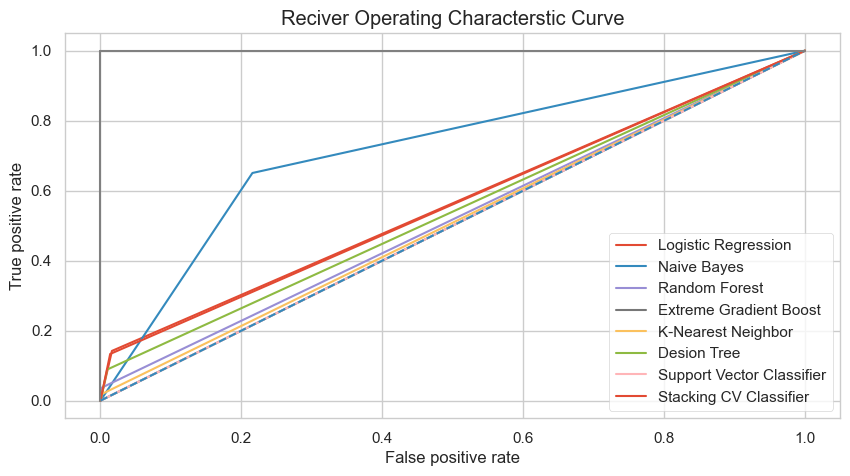

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predicted)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predicted)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
scv_false_positive_rate,scv_true_positive_rate,scv_threshold = roc_curve(y_test,scv_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(scv_false_positive_rate,scv_true_positive_rate,label='Stacking CV Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine', 'Stacking CV'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,scv_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.309321
1,Naive Bayes,76.510755
2,Random Forest,86.036190
3,Extreme Gradient Boost,85.672015
4,K-Nearest Neighbour,85.763059
5,Decision Tree,86.127233
6,Support Vector Machine,85.672015
7,Stacking CV,86.400364


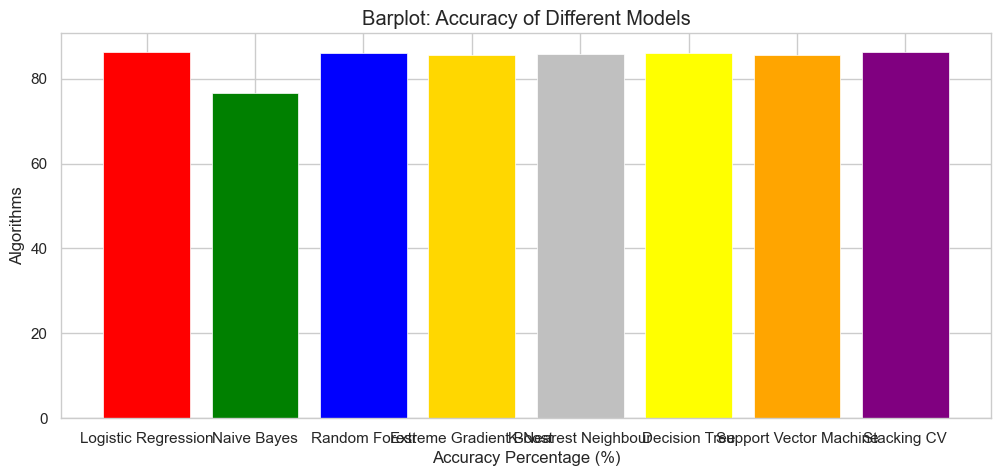

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange', 'purple']
plt.figure(figsize=(12,5))
plt.title("Barplot: Accuracy of Different Models")
plt.xlabel("Accuracy Percentage (%)")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef

# Assuming you have your data loaded into X (predictors) and y (response)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit your model, here we use Logistic Regression as an example
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]  # Probability predictions for AUC-PR

# Compute various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_pr = average_precision_score(y_test, y_prob)  # AUC-PR
mcc = matthews_corrcoef(y_test, y_pred)  # MCC

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")
print(f"MCC: {mcc:.4f}")


Accuracy: 0.8678
Precision: 0.5595
Recall: 0.1564
F1 Score: 0.2445
AUC-PR: 0.4005
MCC: 0.2453


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, matthews_corrcoef

# Assuming X_train, X_test, y_train, y_test are defined from previous code

# Apply oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)

# Initialize and fit Logistic Regression on resampled data
model_resampled = LogisticRegression()
model_resampled.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = model_resampled.predict(x_test)
y_prob_resampled = model_resampled.predict_proba(x_test)[:, 1]

# Compute various metrics on resampled data
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)
auc_pr_resampled = average_precision_score(y_test, y_prob_resampled)
mcc_resampled = matthews_corrcoef(y_test, y_pred_resampled)

# Print the metrics for the model with oversampling
print("Metrics after oversampling:")
print(f"Accuracy: {accuracy_resampled:.4f}")
print(f"Precision: {precision_resampled:.4f}")
print(f"Recall: {recall_resampled:.4f}")
print(f"F1 Score: {f1_resampled:.4f}")
print(f"AUC-PR: {auc_pr_resampled:.4f}")
print(f"MCC: {mcc_resampled:.4f}")


Metrics after oversampling:
Accuracy: 0.7098
Precision: 0.2875
Recall: 0.7587
F1 Score: 0.4170
AUC-PR: 0.4086
MCC: 0.3297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, matthews_corrcoef

# Assuming X_train, X_test, y_train, y_test are defined from previous code

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_rf = best_rf_model.predict(x_test)
y_prob_rf = best_rf_model.predict_proba(x_test)[:, 1]

# Compute various metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_pr_rf = average_precision_score(y_test, y_prob_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Print the metrics for the Random Forest model
print("Metrics after using Random Forest with hyperparameter tuning:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"AUC-PR: {auc_pr_rf:.4f}")
print(f"MCC: {mcc_rf:.4f}")

KeyboardInterrupt: 

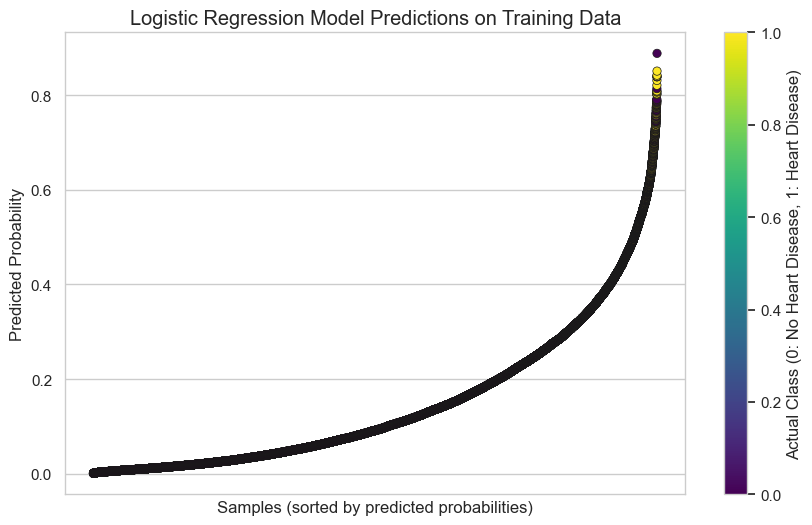

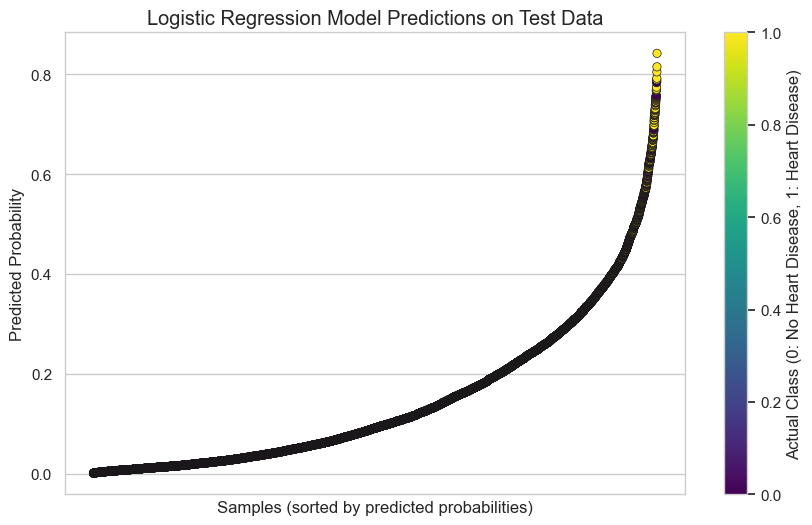

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have your heart disease dataset loaded into X and y

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Make predictions on training data and test data
train_predictions = logreg_model.predict_proba(x_train)[:, 1]  # Predicted probabilities for training data
test_predictions = logreg_model.predict_proba(x_test)[:, 1]    # Predicted probabilities for test data

# Sort the training predictions by ascending order
sorted_indices_train = np.argsort(train_predictions)
sorted_train_predictions = train_predictions[sorted_indices_train]
sorted_y_train = y_train.values[sorted_indices_train]

# Sort the test predictions by ascending order
sorted_indices_test = np.argsort(test_predictions)
sorted_test_predictions = test_predictions[sorted_indices_test]
sorted_y_test = y_test.values[sorted_indices_test]

# Plot the prediction model scatter plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_train_predictions)), sorted_train_predictions, c=sorted_y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Samples (sorted by predicted probabilities)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Model Predictions on Training Data')
plt.colorbar(label='Actual Class (0: No Heart Disease, 1: Heart Disease)')
plt.xticks([])
plt.show()

# Plot the prediction model scatter plot for test data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_test_predictions)), sorted_test_predictions, c=sorted_y_test, cmap='viridis', edgecolors='k')
plt.xlabel('Samples (sorted by predicted probabilities)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Model Predictions on Test Data')
plt.colorbar(label='Actual Class (0: No Heart Disease, 1: Heart Disease)')
plt.xticks([])
plt.show()


ValueError: x and y must be the same size

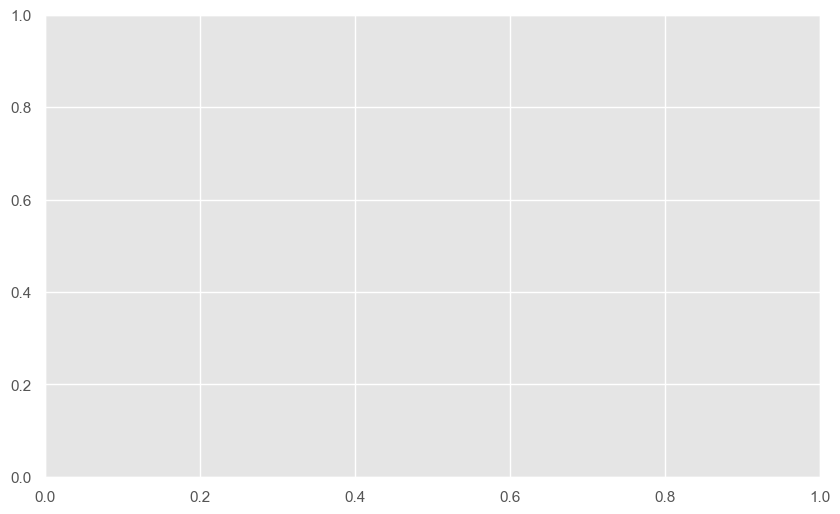

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on both training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate the mean squared error for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Create a plot to visualize the prediction accuracy
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.plot(x_train, y_train_pred, color='green', linewidth=2, label='Predictions on training data')
plt.plot(x_test, y_test_pred, color='orange', linewidth=2, label='Predictions on testing data')
plt.title('Model Prediction Accuracy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the mean squared error for both sets
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
